In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
goog = pdr.get_data_yahoo('GOOG', start='2009-03-14', end='2014-04-14')

[*********************100%%**********************]  1 of 1 completed


In [3]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-07,26.962973,27.348913,26.285334,26.833828,26.833828,88033033
2014-04-08,27.055719,27.674021,27.006353,27.669035,27.669035,63024560
2014-04-09,27.904388,28.191101,27.571802,28.129770,28.129770,66616395
2014-04-10,28.172651,28.172651,26.921087,26.973444,26.973444,80737057
2014-04-11,26.554594,26.926073,26.254417,26.457361,26.457361,78496923


In [4]:
goog['LogRet'] = np.log(goog['Close'] / goog['Close'].shift(1))

In [5]:
goog['Volatility'] = goog['LogRet'].rolling(252).std()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

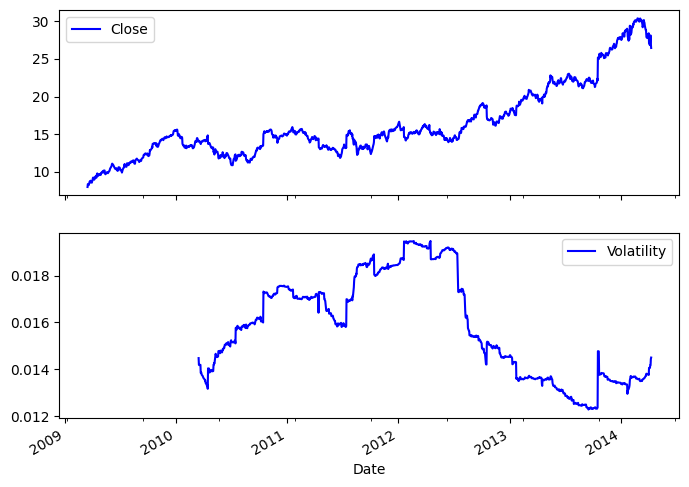

In [6]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8,6))

In [7]:
sp500 = pdr.get_data_yahoo('^GSPC', start='2000-01-01', end='2014-04-15')

[*********************100%%**********************]  1 of 1 completed


In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3592 non-null   float64
 1   High       3592 non-null   float64
 2   Low        3592 non-null   float64
 3   Close      3592 non-null   float64
 4   Adj Close  3592 non-null   float64
 5   Volume     3592 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


<Axes: xlabel='Date'>

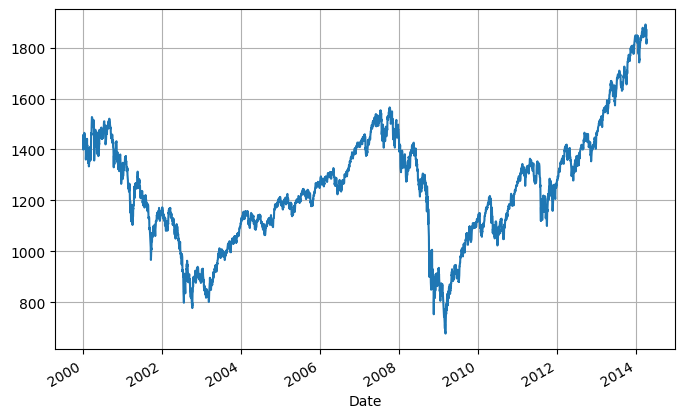

In [9]:
sp500['Close'].plot(grid=True, figsize=(8, 5))

In [10]:
sp500['42d'] = np.round(sp500['Close'].rolling(42).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(252).mean(), 2)

In [11]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2014-04-08,1851.959961,1853.88,1728.66
2014-04-09,1872.180054,1855.67,1729.79
2014-04-10,1833.079956,1856.46,1730.74
2014-04-11,1815.689941,1856.36,1731.64
2014-04-14,1830.609985,1856.63,1732.74


<Axes: xlabel='Date'>

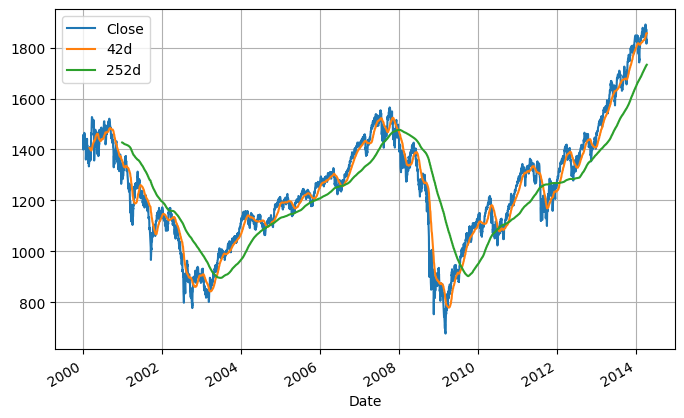

In [12]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [13]:
DAX = pdr.get_data_yahoo('^GDAXI', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [14]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6071 entries, 2000-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6071 non-null   float64
 1   High       6071 non-null   float64
 2   Low        6071 non-null   float64
 3   Close      6071 non-null   float64
 4   Adj Close  6071 non-null   float64
 5   Volume     6071 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 332.0 KB


In [15]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-20,15915.240234,15929.929688,15854.820312,15901.330078,15901.330078,93605500
2023-11-21,15911.019531,15948.070312,15891.309570,15900.530273,15900.530273,70926900
2023-11-22,15965.129883,15998.410156,15931.740234,15957.820312,15957.820312,58757800
2023-11-23,15976.620117,16005.450195,15958.059570,15994.730469,15994.730469,38717400
2023-11-24,15988.190430,16041.169922,15972.669922,16029.490234,16029.490234,46227600


<Axes: xlabel='Date'>

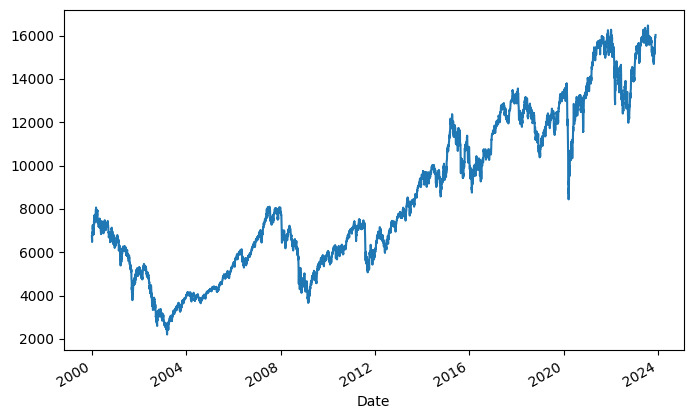

In [16]:
DAX['Close'].plot(figsize=(8, 5))

In [17]:
DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

In [18]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-11-20,15915.240234,15929.929688,15854.820312,15901.330078,15901.330078,93605500,-0.001121
2023-11-21,15911.019531,15948.070312,15891.309570,15900.530273,15900.530273,70926900,-0.000050
2023-11-22,15965.129883,15998.410156,15931.740234,15957.820312,15957.820312,58757800,0.003597
2023-11-23,15976.620117,16005.450195,15958.059570,15994.730469,15994.730469,38717400,0.002310
2023-11-24,15988.190430,16041.169922,15972.669922,16029.490234,16029.490234,46227600,0.002171


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

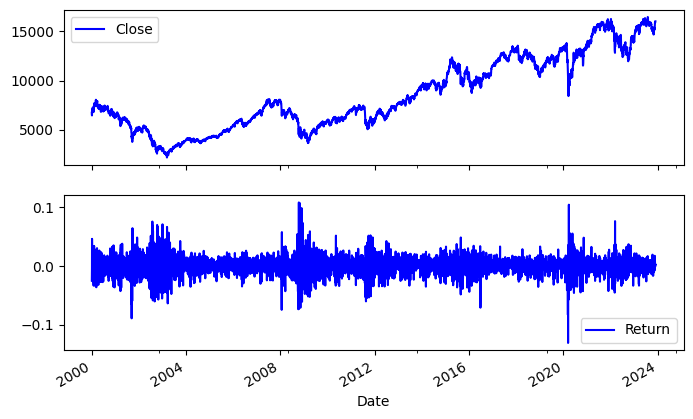

In [19]:
DAX[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

In [20]:
DAX['42d'] = DAX['Close'].rolling(42).mean()
DAX['252d'] = DAX['Close'].rolling(252).mean()

<Axes: xlabel='Date'>

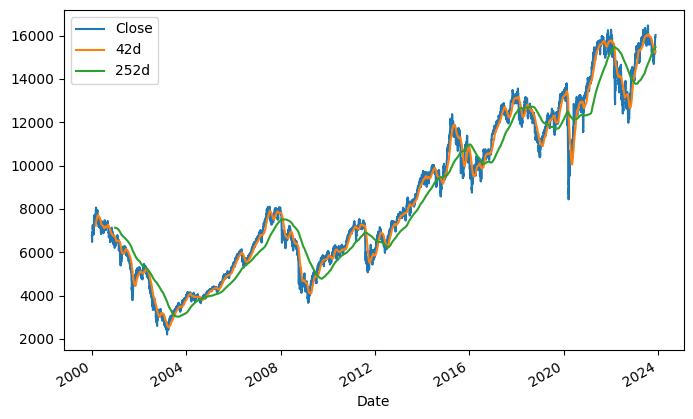

In [21]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5))

In [22]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std() * math.sqrt(252)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

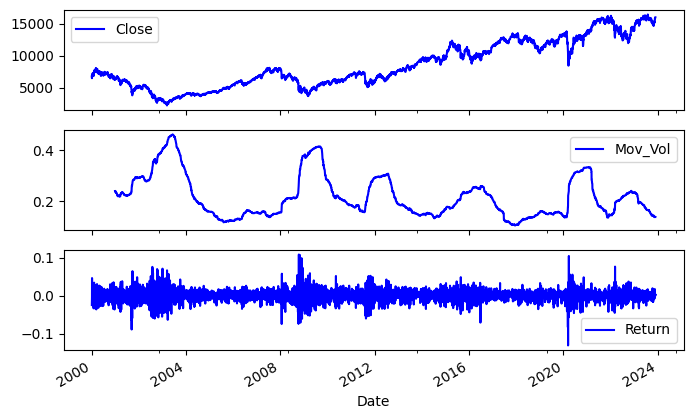

In [23]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,5))

In [24]:
import requests

In [25]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

es = requests.get(es_url)
vs = requests.get(vs_url)


In [26]:
with open('./data/es.txt', 'wb') as outfile:
    outfile.write(es.content)

In [27]:
with open('./data/vs.txt', 'wb') as outfile:
    outfile.write(vs.content)

In [28]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [29]:
new_file = open('./data/es50.txt', 'w')
new_file.writelines('date' + lines[3][:-1]
                     + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [30]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [31]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)

In [32]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [33]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


In [34]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)

In [35]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6I7    4357 non-null   float64
 8   V6I8    4343 non-null   float64
dtypes: float64(9)
memory usage: 340.4 KB


In [36]:
# regression analysis
data = pd.DataFrame({'EUROSTOXX':
                     es['SX5E'][(es.index > dt.datetime(1999, 1, 1)) & (es.index <= dt.datetime(2014, 9, 26))]})
data = data.join(pd.DataFrame({'VSTOXX':
                                vs['V2TX'][(vs.index > dt.datetime(1999, 1, 1)) & (vs.index <= dt.datetime(2014, 9, 26))]}))

In [37]:
# forward fill missing values
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4034 non-null   float64
 1   VSTOXX     4034 non-null   float64
dtypes: float64(2)
memory usage: 223.6 KB


C:\Users\pokem\AppData\Local\Temp\ipykernel_1680\3987232662.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [38]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2014-09-22,3257.48,15.8303
2014-09-23,3205.93,17.7684
2014-09-24,3244.01,15.9504
2014-09-25,3202.31,17.5658
2014-09-26,3219.58,17.6012


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

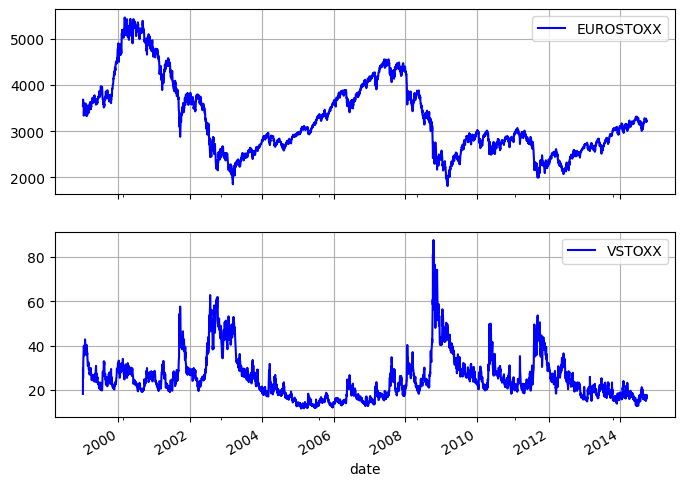

In [39]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [40]:
# log returns
rets = np.log(data / data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
date,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

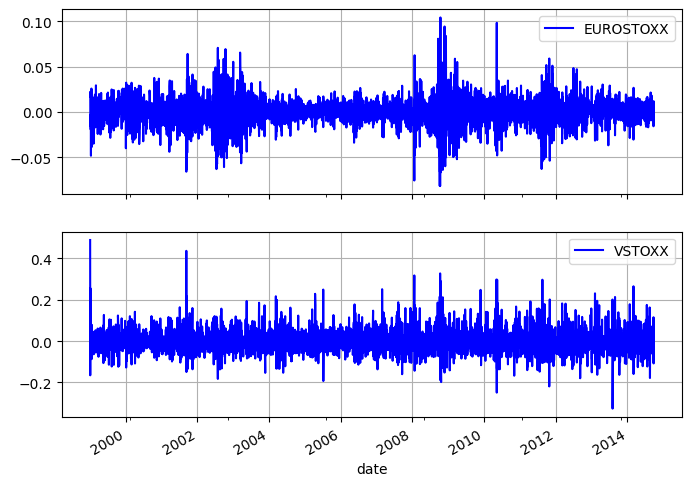

In [41]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [42]:
import statsmodels.formula.api as sm

In [43]:
# EUROSTOXX is independent variable, VSTOXX is the response

model = sm.ols(formula="VSTOXX ~ EUROSTOXX", data=rets).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 VSTOXX   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     4586.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:50:31   Log-Likelihood:                 7369.8
No. Observations:                4033   AIC:                        -1.474e+04
Df Residuals:                    4031   BIC:                        -1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.37e-05      0.001     -0.120      0.9

In [44]:
model.params
# there is a negative correlation

Intercept   -0.000074
EUROSTOXX   -2.752894
dtype: float64

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'VSTOXX returns')

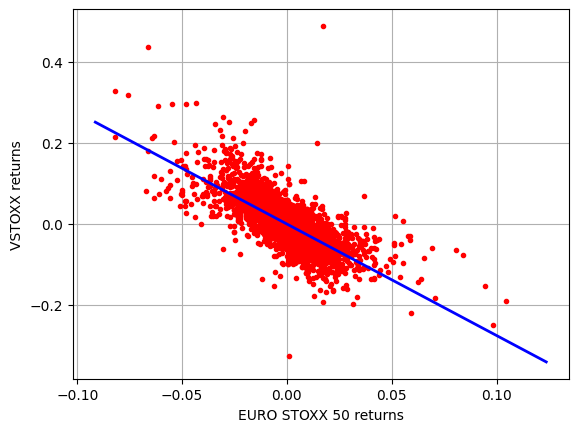

In [46]:
plt.plot(rets['EUROSTOXX'], rets['VSTOXX'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params['Intercept'] + model.params['EUROSTOXX'] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [47]:
# calculate correlation between the two directly
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.729538
VSTOXX,-0.729538,1.000000


<Axes: xlabel='date'>

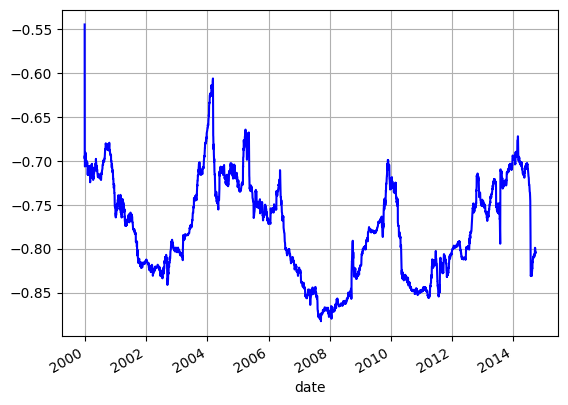

In [48]:
# correlation on a yearly basis, 252 trading days
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')